# Machine Learning - An introduction


## Structure of  the class  
___

### Part I: Machine Learning
  - Basics & Theory
    - What's this all about?
    - Supervised, Unsupervised Learning
    - Classification, Regression, Clustering
  - Python Basics for Data Science / ML
    - numpy, scipy
    - scikit learn
    - pytorch
  - Hands-on examples
    - Classification
        * Churn prediction
        * Digit classification
    - Regression example
        * Estimating House Prices
    - Clustering
        - kmeans document clustering


  - What is Machine Learning anyway?
  - Some examples


# Machine Learning


A (very informal) definition: Build machines that learn through examples (data) and generalize to unseen data


Examples we are all using in a daily basis:

      - Car plate detection systems
      - spam email classifier  
      - voice recognition in smartphones
      - face recognition @ facebook 
      - amazon recomendations  
      

Aim of this series is to build the foundations and principles to be able to implement some of this systems from scratch. 


### Introduction and definitions 


Machine learning problems are categorized in 3 broad categories as below, based on the nature/form of the available data.



#### Supervised Learning
   
    Here, the data comes with (a fixed number of) labels  
    
      
      - a dataset of emails and for every email a flag if it is spam or not spam 
      - photos of animals, where for each photo we have a label if it is a cat or a dog (assume for a moment there is only one animal per photo) 
      - fraud detection: a dataset with valid and fraudulent transation examples
      
#### Unsupervised Learning
    
     In the unsupervised learning case, data comes without labels 
     
     - a collection of documents
     - a collection of photographs
     - timeseries data
   
#### Reinforcement Learning
    
    Here, the goal is to train an AI agent to learn how to navigate and take actions in a completely unknown environment. We won't be covering RL in this course.  


### Supervised Learning Problems
   
   
#### Regression (Παλλινδρόμηση)

      In regression, the outcome we are trying to predict is or can be thought as real number (for example house prices, demand etc)    

#### Classification (Ταξινόμηση)
    
    In classification the target variable is one of many categories. For example (cat, dog, bird), (spam, non-spam), (fraud, non-fraud)

#### Classification 

The repeating pattern in supervised learing is that data comes with labels and we wish to build a system to be able to predict the label given a new data example. For example, if we are building a pet detection system, we would like the system to answer that this is a photo of a cat with very high accuracy, eg predict the class of of the new image to be a cat and not a dog or a bird.


<b><span style="color:red">WARNING: MATHS AHEAD</span></b>

Without being too formal, we would like to learn from the data a function $f(x) \to D $, where $x \in X$ is a data instance and D the set of the labels to be predicted.

This function must have the property to be able to produce correct results in new, unseen data. That is, if we take a photo of a random cat somewhere in the world and we feed this cat in to our system, the system should be able to respond that this is a cat although it has never seen this cat before. We call this fuction property **Generalisation** and is the most important aspect of machine learning systems: to be able to perform well in unseen data.


Given the above, we need the following ingredients to build a machine learning system
- The function we are going to be using to model our data (usually called hypothesis) 
- A way to measure how "wrong" this function is and a configuration of its parameters, given our data. This is called the loss function.
- A way to train this function, eg to modify the parameters in such a way that the error is minimised 
- A way to test this function to new, unseen data and make a claim of how well we expect this function to behave in unseen data. 

Similarly, for the regression part, instead of trying to predict a label we now try to predict a real value number. 

Again we need a hypothesis, a loss function, a way to tune the hypothesis and a way to see how well we are generalizing to unseen data.


Let's see that in practice. 


## Parametrics vs Non-Parametric learning algorithms


Based on the nature of the hypothesis function, an ML model can be categorized as `parametric` or `non-parametric`

A parametric algorithm is one where the hypothesis function is controlled by parameters (or weights).
An example of such an algorithm is Linear Regression or a Neural Network, we are trying to find the weights/parameters that optimize the loss function. As long as we have these values, the training data can then be discarded.



Non-parametric models differ from parametric models in that the model structure is not specified a priori but is instead determined from data. The term non-parametric is not meant to imply that such models completely lack parameters but that the number and nature of the parameters are flexible and not fixed in advance.


A typicall example of non-parametric model is a very simple model, known as the kNN algorithm as we will see bellow. One thing to keep in mind with non-parametric algoriths is that we need to keep the entire training dataset when we are moving the model into production





## Regression algorithms

#### Linear Regression

One of  the simplest parametric models in statistics and machine learning is Linear Regression. 

Linear Regression tries to find a best straight line to fit the data. 


##### Linear Regression Example


<img src="./images/lr2.jpg"> 



We are given a data set D of values  $\{ (x_i,y_i) \}$ and our hypothesis is that there is a straight line 
$y = h(x) = w_0 + w_1  x$ that fits the data. 

We are now asked to find the "best" weights w that fit our data.

A typicall way to define "best" is to try to minimize the square difference between our targets y and what the model predicts, $\hat{y} = f(x)$,  eg minimize the total loss 

$$ L = \sum_i{  ( y_i - \hat{y_i})^2 } = \sum_i{  ( y_i - \ w_0 + w_1 x_i )^2 }$$ 

There a few ways to do that, either look for a closed form analytic expression or use an optimisation algorithm such as gradient descent. 


## Classification algorithms

### k-nearest neighbors algorithm


Imagine we are given a dataset of handwritten digits 0-9. Each digit image has fixed dimensions (for example 28x28, the MNIST dataset).

We would like to build a classification system which will classify new incoming digits. One straightforwad way to do this is to compare the given new digit with every other digit we have in our dataset, pick k most similar digits to our new digit and report as classification decision the majority of the most similar votes.



For example, let's assume that k=3 and the most similar images to our new image are images with labels 0,0,8.
The class "0" appears 2 times so we will report that this image is a `0`. 
This is the k-NN algorithm, where $k$ is what we call a `hyperparameter`: 

A parameter that controls the behaviour of the algorithm and its optimal value is typically a "function" of the data.



Question 1: What is missing here for the algorithm to work?
Question 2: What is the obvious problem with this algorithm?


### Logistic regression

Consider a binary classification problem, with two classes, say emails labeld `spam` and `non-spam`.


One of the most common models in Statistics and Machine Learning is a model called Logistic Regression. 

(Beware: it is **not** a regression model, but rather a classification model).



Let's denote $p = Pr( label=spam | x )$ where x is a training example. Then, 1-p is the probability of x is non spam. Logistic Regression makes the assumption that the log-odd ratio of the probabilities is a linear model:

$$ \frac{p}{1-p} = w_0 + w_1  x_1  + ... + w_n x_n  $$


after doing some math, we obtain that

$$ p(x) =  \frac{1}{1+e^{-(w_0 + w_1  x_1  + ... + w_n x_n )}} $$




the function $s(x) = \frac{1}{ 1 + e^{-x} } $ is called the `sigmoid` function and is a fundamendal building block in Neural Networks and classification problems.





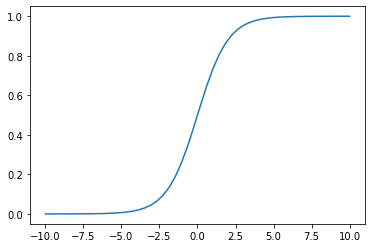

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def sigmoid(x):
    return 1/(1+np.exp(-x))


X = np.linspace( -10, 10)
Y = sigmoid(X)

plt.plot( X, Y )
plt.show()

## Gradient descent and stochastic gradient descent 




Say we want to find a -local- minimum of a differentiable function. 
One way to do it is the following:


We start at a random point, calculate the gradient at this point and take a step proportional to the the gradient's negative direction.


Let's illustrate this 



<img src="images/gd2d.jpg"> 
<img src="images/gd3d.jpg"> 




In Machine Learning, the function we are trying to minimize is the loss function. What we get back is the optimal values (weights, parameters) of the model, minimizing loss. 

Typically, the loss is a function of the entire training set. We can calculate loss the in the entire training set and perform gradient descent. This can be very slow however, especially when the training data set is large, so what we typically do is we shuffle the training data and we calculate the loss in small batches (mini batches) of 16,32 etc examples. And then we move towards the negative gradient of this mini-batch.

This is called Stochastic Gradient Descent (SGD) and it is the main method when we are training Neural Nets and Deep Learning models.

## Generallization, model performance 


When we are solving a supervised learning problem, we are given data and labels and we want to build a predictive model which will be good enough to generalize to unseen data.



### Train/Validation/Test
A common way to proceed is to split the data in 3 parts, assuming we have enough data. Sometimes this is a reasonable assumption, some times it is not.


We split the data in train, validation and test parts. (80/10/10 typically or something similar)

We then train the model in the 80% of the data and we validate/optimise the model in the validate data. When we are happy, then ** and only then ** we are testing the model's performance on the test data. 




### Cross Validation
Another strategy used in practice is Cross Validation.


Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

- Shuffle the dataset randomly.
- Split the dataset into k groups
- For each unique group:
       - Take the group as a hold out or test data set
        - Take the remaining groups as a training data set
        - Fit a model on the training set and evaluate it on the test set
        - Retain the evaluation score and discard the model
- Summarize the skill of the model using the sample of model evaluation scores


### Hyperparameter optimisation 


In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data.[1] The objective function takes a tuple of hyperparameters and returns the associated loss.

Cross-validation is often used to estimate this generalization performance.



#### Hyperparameter optimisation strategies

- Grid Search 
- Randomised Search 
- Advanced search methods (Gaussian Processes/Bayesian Optimisation)



## Dot products and cosine similarity 


####  dot product

The dot (inner) product is a crusial operation in Machine Learning as it used to quantify vector similarity

$ <x,y> = \sum{x_i \cdot y_i} $

Generally, when we need to compare vectors their length is not important. Rather, we are mostly interested in vectors that have the same direction. A standard way to quantify similarity of vectors then is their angle: the smaller the angle the most similar the vectos are. If the angle is zero, the vectors are "identical" since they are pointing to the same direction.

Casting this to a similarity measure is typically done by using the cosine of the angle between the two vectors. 


####  cosine similarity


the cosine of two vectors is their dot product, normalized by the vector lengths:

$$ cos( u , v ) = \frac{ < u , v > } { ||u|| ||v|| }  =  \frac{ u^T v }{ ||u|| ||v|| }  $$ 